# Lec150: Programming Illustration - Small World Network (Introduction)

1. Making a small world world
2. Myopic Search

<img src = "lec150_1.png" alt = "IMG NOT FOUND">
<img src = "lec150_2.png" alt = "IMG NOT FOUND">
<img src = "lec150_3.png" alt = "IMG NOT FOUND">

rewiring -> Removing one edge and Adding the weak ties

# Lec151: Small World Network (Base Code)


<IPython.core.display.Javascript object>


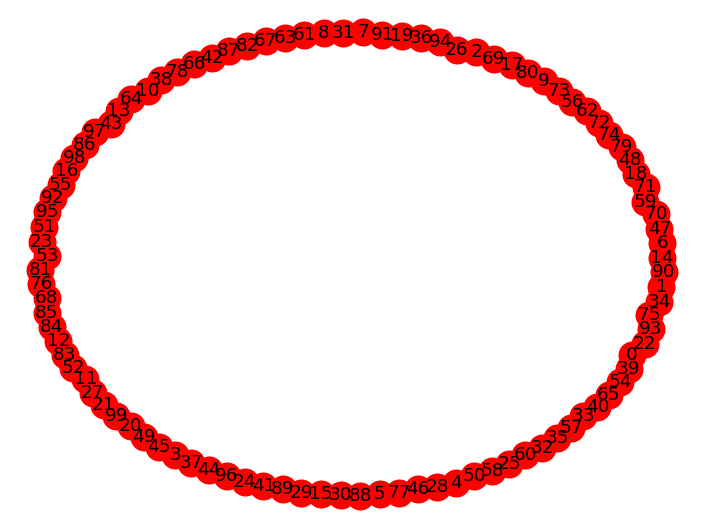

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook

G = nx.Graph()
G.add_nodes_from(range(100))

plt.figure()
nx.draw(G, with_labels = 1)

# Lec152: Small World Network (Making Homophily based edges)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
0 1 99 2 98
1 2 0 3 99
2 3 1 4 0
3 4 2 5 1
4 5 3 6 2
5 6 4 7 3
6 7 5 8 4
7 8 6 9 5
8 9 7 10 6
9 10 8 11 7
10 11 9 12 8
11 12 10 13 9
12 13 11 14 10
13 14 12 15 11
14 15 13 16 12
15 16 14 17 13
16 17 15 18 14
17 18 16 19 15
18 19 17 20 16
19 20 18 21 17
20 21 19 22 18
21 22 20 23 19
22 23 21 24 20
23 24 22 25 21
24 25 23 26 22
25 26 24 27 23
26 27 25 28 24
27 28 26 29 25
28 29 27 30 26
29 30 28 31 27
30 31 29 32 28
31 32 30 33 29
32 33 31 34 30
33 34 32 35 31
34 35 33 36 32
35 36 34 37 33
36 37 35 38 34
37 38 36 39 35
38 39 37 40 36
39 40 38 41 37
40 41 39 42 38
41 42 40 43 39
42 43 41 44 40
43 44 42 45

<IPython.core.display.Javascript object>


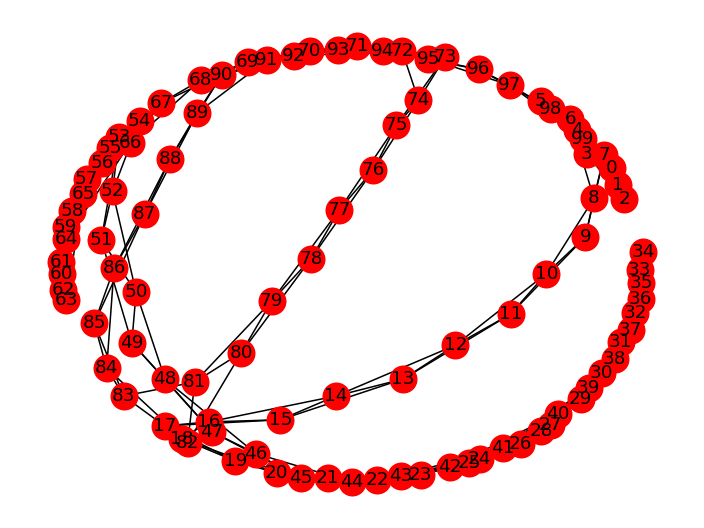

In [29]:
def add_edges(G):
    list_nodes = G.nodes()
    print list_nodes
    for i in range(0, len(list_nodes)):
        print list_nodes[i], list_nodes[(i+1)%len(list_nodes)], list_nodes[i-1],  list_nodes[(i+2)%len(list_nodes)], list_nodes[i-2]
        G.add_edge(list_nodes[i], list_nodes[(i+1)%len(list_nodes)])
        G.add_edge(list_nodes[i], list_nodes[(i+2)%len(list_nodes)])
        G.add_edge(list_nodes[i], list_nodes[i-1])
        G.add_edge(list_nodes[i], list_nodes[i-2])
    return G
    
G = add_edges(G)

plt.figure()
nx.draw(G, with_labels = 1)

# Lec153: Small World Network (Adding Weak Ties)


Edge Added :  43 50


<IPython.core.display.Javascript object>


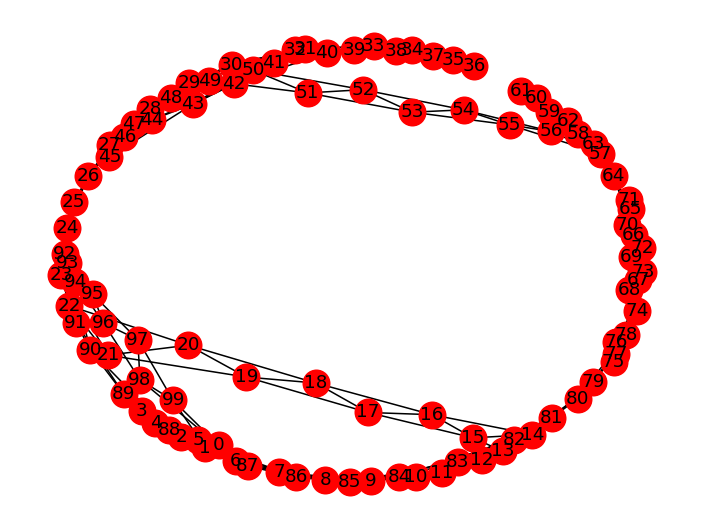

In [30]:
import random

def add_long_link(G):
    v1 = random.choice(G.nodes())
    v2 = random.choice(G.nodes())
    while v1 == v2:
        v1 = random.choice(G.nodes())
        v2 = random.choice(G.nodes())
    G.add_edge(v1, v2)
    print "Edge Added : ", v1, v2
    
    return G

G = add_long_link(G)
plt.figure()
nx.draw(G, with_labels = 1)

# Lec154: Small World Network (Plotting Change in Diameter)



In [31]:
limit = 11

x = [i for i in range(1, limit)] 
y = [nx.diameter(G)]

for _ in range(2, limit): #1 long range edge is already added
    G = add_long_link(G)
    y.append(nx.diameter(G))
    


Edge Added :  54 60
Edge Added :  52 89
Edge Added :  86 61
Edge Added :  17 55
Edge Added :  53 36
Edge Added :  62 71
Edge Added :  33 81
Edge Added :  25 22
Edge Added :  0 28


<IPython.core.display.Javascript object>


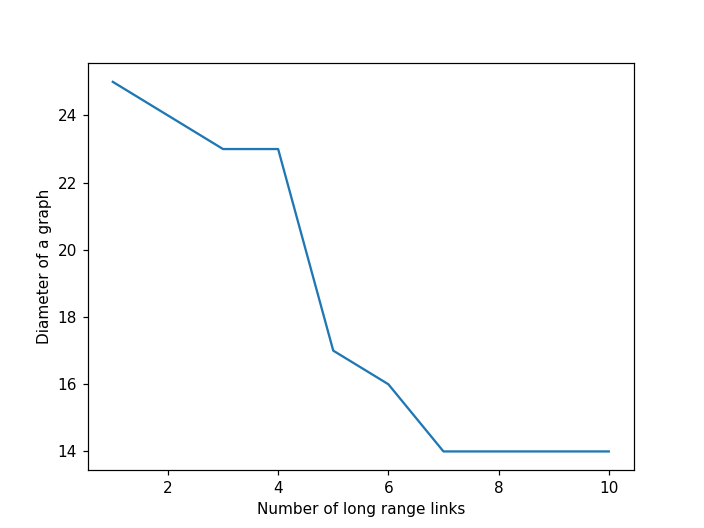

In [32]:
plt.figure()
plt.plot(x, y)
plt.xlabel("Number of long range links")
plt.ylabel("Diameter of a graph")